I went to a nice one day Machine learning bootcamp some time ago organised by Aspiring Minds, they are actually doing some good stuff in Machine learning. So they gave us a this dataset which contains details about people who gave their test and also the salaries of the students after they go a job and you had to predict these salaries based on their details like gender,10th and 12th marks,their scores in various tests etc. it sounded like a interesting problem. They taught  bit about how to get started on it and then there were a few interesting talks, but I was quite curious about the problem so I worked on it afterwards.

We will start with importing some libraries pandas, matplotlib, seaborn etc.
After that we will load the data using pandas and take a look at it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_excel('train.xlsx')
df.reset_index(drop=True, inplace=True)
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

There are a lot of interesting columns, but we will not use the *Computer Programming*, *ElectricalEngg* etc branch wise scores as they are already reflected in the Domain column. Also we will not need DOJ and ID. There are going to be too many categorical values in the College city and Job city columns so we are not using them at the moment as well.

In [5]:
basic_cols = [u'Salary', u'Gender', u'10percentage', u'10board', 
          u'12graduation', u'12percentage', u'12board', u'CollegeID', 
          u'CollegeTier', u'Degree', u'Specialization', u'collegeGPA', u'CollegeCityTier', u'CollegeState', 
          u'GraduationYear', u'English', u'Logical', u'Quant', u'Domain', u'conscientiousness', 
          u'agreeableness', u'extraversion', u'nueroticism', u'openess_to_experience', 'Designation']


In [6]:
data = df[basic_cols]

In [7]:
data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,1.995300,1.904800,2.535400,3.352500,1.822400


Lets start looking at a few the numerical features, starting with *collegeGPA*.

In [18]:
data.collegeGPA.describe()

count    3998.000000
mean       71.695728
std         7.406631
min        49.070000
25%        66.505000
50%        71.800000
75%        76.400000
max        99.930000
Name: collegeGPA, dtype: float64

Looks like most of them are out of 100 but many some are below 10 too, a histogram will give us a better idea.

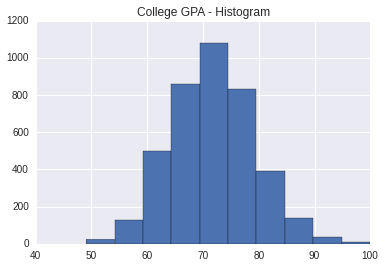

In [19]:
data.collegeGPA.hist(bins=10)
plt.title('College GPA - Histogram')

I am guessing no one scored less than 10 out of 100 so converting all 10 scale to 100.

In [20]:
data.loc[data.collegeGPA <=10, 'collegeGPA'] = data.collegeGPA*10

(0, 100)

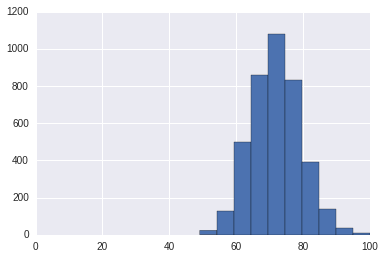

In [21]:
data.collegeGPA.hist()
plt.xlim(0,100)

*collegeGPA* looks good now

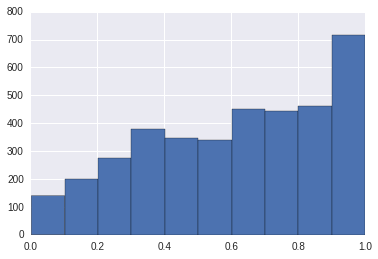

In [22]:
data.Domain.hist()

There are -1 values the *domain* column, which probably means they don't exist for some reason. So we'll change them to null using numpy.

In [23]:
data = data.replace('-1', np.nan)

Should be good now lets find some kind of relationships between Salary (target column) and some features.

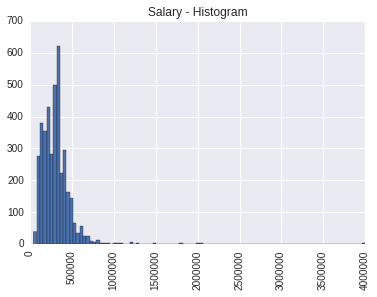

In [24]:
data.Salary.hist(xrot =90, bins = 100)
plt.title('Salary - Histogram')


Salary distribution looks good so looks like no changes required in that.

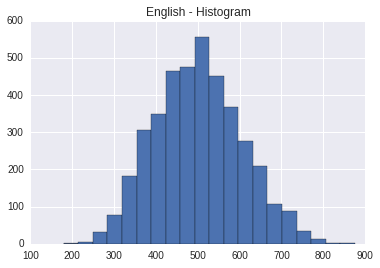

In [25]:
data.English.hist(bins=20)
plt.title('English - Histogram')

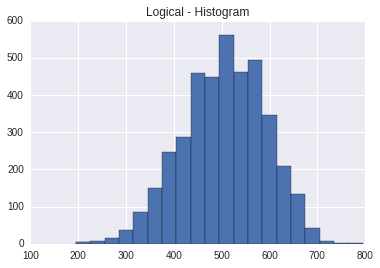

In [26]:
data.Logical.hist(bins=20)
plt.title('Logical - Histogram')

There is a simillar kind of pattern for both.

As you saw there were a lot of categorical features. Lets get a look at the values in those categorical features, lets see the most frequent ones.

In [27]:
non_num_cols = list(set(data.columns) - set(data._get_numeric_data().columns))

for col in non_num_cols:
    print('{} has unique values: {}'.format(col, data[col].unique().shape[0]))
    if data[col].unique().shape[0] > 4 :
        print('{}'.format(data[col].value_counts().iloc[:5]))
        print('\n')
    else:
        print('{}'.format(data[col].value_counts().iloc[:data[col].unique().shape[0]]))
        print('\n')

Gender has unique values: 2
m    3041
f     957
Name: Gender, dtype: int64


Designation has unique values: 419
software engineer     539
software developer    265
system engineer       205
programmer analyst    139
systems engineer      118
Name: Designation, dtype: int64


12board has unique values: 340
cbse           1400
state board    1254
0               359
icse            129
up board         87
Name: 12board, dtype: int64


Specialization has unique values: 46
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
Name: Specialization, dtype: int64


CollegeState has unique values: 26
Uttar Pradesh    915
Karnataka        370
Tamil Nadu       367
Telangana        319
Maharashtra      262
Name: CollegeState, dtype: int64


10board has unique values: 275
cbse           1395
state board    116

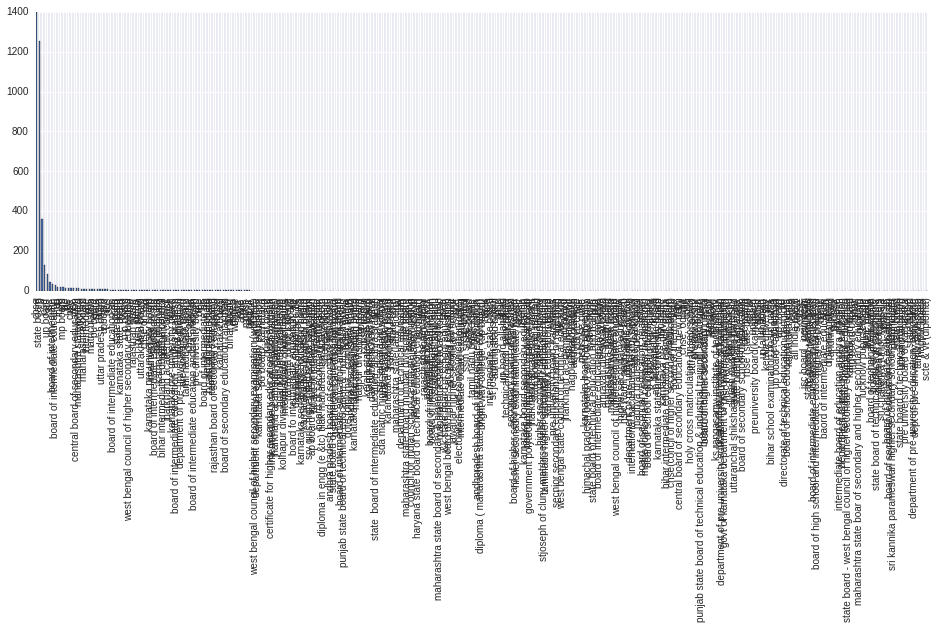

In [28]:
data['12board'].value_counts().plot(kind='bar', figsize=(16,5))

Too many categories in 12board feature lets reduce them a bit.

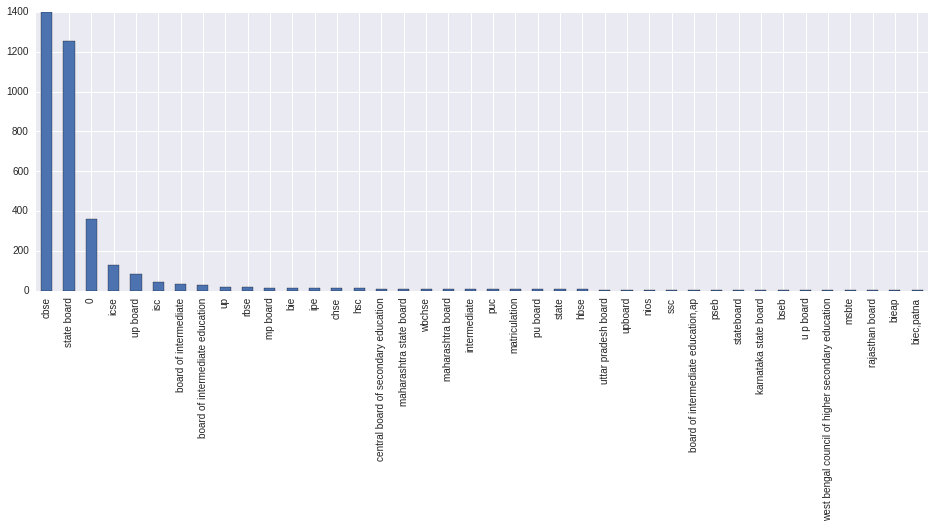

In [29]:
data['12board'].value_counts()[:40].plot(kind='bar', figsize=(16,5))

There are two categories with more that 1200 counts one more above 200 rest are very small in counts to be usefull, so I am thinking we should take the most frequent categories and convert them into dummy variables while ignoring categories with low counts as they will have very little effect on the output, simmilaly we will deal with the *10board* feature as it is simmilar to *12board*.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
data.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Designation'],
      dtype='object')

In [236]:
data['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

As we can see the proportion of value counts less than 10 is very small as in the *Specialization* feature as well thus we will create dummy variables for categories with less than 10 value counts for features *10board*,*12board* and *Specialization*.

In [32]:
tenBoard = pd.get_dummies(data['10board'],prefix='tenB')
twBoard = pd.get_dummies(data['12board'],prefix='twB')
speciali = pd.get_dummies(data['Specialization'],prefix='spl')

In [33]:
tenBoard_new = tenBoard[(tenBoard.sum()>=10).index[(tenBoard.sum()>=10)]]

In [34]:
twBoard_new = twBoard[(twBoard.sum()>=10).index[(twBoard.sum()>=10)]]

In [35]:
speciali_new = speciali[(speciali.sum()>=10).index[(speciali.sum()>=10)]]

The given features plus the dummy features created above are the ones we will be sticking to.

In [36]:

X_col = [u'Gender', u'10percentage', u'12graduation', u'12percentage', u'CollegeTier',
     u'Degree', u'collegeGPA', u'CollegeCityTier', u'GraduationYear', u'English', u'Logical', 
     u'Quant', u'Domain', u'conscientiousness', u'agreeableness', u'extraversion', u'nueroticism', u'openess_to_experience']

y_col = 'Salary'

df_exp = data[X_col + [y_col]]
df_exp = pd.concat([df_exp,tenBoard_new,twBoard_new,speciali_new],axis=1)
df_exp.columns

Index(['Gender', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'Degree', 'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Salary',
       'tenB_0', 'tenB_board of secondary education', 'tenB_cbse',
       'tenB_central board of secondary education', 'tenB_icse',
       'tenB_karnataka state board', 'tenB_kseeb',
       'tenB_maharashtra state board', 'tenB_matriculation', 'tenB_mp board',
       'tenB_rbse', 'tenB_ssc', 'tenB_sslc', 'tenB_state board', 'tenB_up',
       'tenB_up board', 'tenB_upboard', 'tenB_wbbse', 'twB_0', 'twB_bie',
       'twB_board of intermediate', 'twB_board of intermediate education',
       'twB_cbse', 'twB_central board of secondary education', 'twB_chse',
       'twB_hsc', 'twB_icse', 'twB_ipe', 'twB_isc', 'twB_maharashtra board',
       'twB_maharashtra state board', 'twB_mp board', '

In [37]:
cols = ['10percentage', '12graduation', '12percentage', 'CollegeCityTier',
       'CollegeTier', 'Degree', 'Domain', 'English', 'Gender',
       'GraduationYear', 'Logical', 'Quant', 'Salary', 'agreeableness',
       'collegeGPA', 'conscientiousness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'spl_biotechnology', 'spl_civil engineering',
       'spl_computer application', 'spl_computer engineering',
       'spl_computer science & engineering', 'spl_electrical engineering',
       'spl_electronics & instrumentation eng',
       'spl_electronics & telecommunications',
       'spl_electronics and communication engineering',
       'spl_electronics and electrical engineering',
       'spl_electronics and instrumentation engineering',
       'spl_electronics engineering',
       'spl_industrial & production engineering',
       'spl_information science engineering', 'spl_information technology',
       'spl_instrumentation and control engineering',
       'spl_mechanical engineering', 'spl_other', 'tenB_0',
       'tenB_board of secondary education', 'tenB_cbse',
       'tenB_central board of secondary education', 'tenB_icse',
       'tenB_karnataka state board', 'tenB_kseeb',
       'tenB_maharashtra state board', 'tenB_matriculation', 'tenB_mp board',
       'tenB_rbse', 'tenB_ssc', 'tenB_sslc', 'tenB_state board', 'tenB_up',
       'tenB_up board', 'tenB_upboard', 'tenB_wbbse', 'twB_0', 'twB_bie',
       'twB_board of intermediate', 'twB_board of intermediate education',
       'twB_cbse', 'twB_central board of secondary education', 'twB_chse',
       'twB_hsc', 'twB_icse', 'twB_ipe', 'twB_isc', 'twB_maharashtra board',
       'twB_maharashtra state board', 'twB_mp board', 'twB_rbse',
       'twB_state board', 'twB_up', 'twB_up board', 'twB_wbchse']
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 74 columns):
Gender                                             3998 non-null object
10percentage                                       3998 non-null float64
12graduation                                       3998 non-null int64
12percentage                                       3998 non-null float64
CollegeTier                                        3998 non-null int64
Degree                                             3998 non-null object
collegeGPA                                         3998 non-null float64
CollegeCityTier                                    3998 non-null int64
GraduationYear                                     3998 non-null int64
English                                            3998 non-null int64
Logical                                            3998 non-null int64
Quant                                              3998 non-null int64
Domain                           

Only the *Domain* feature has a few null values and it looks like an important feature so instead of removing the feature we will remove the rows with null values in *Domain* column.

In [38]:
df_exp.dropna(subset=cols, inplace=True)
df_exp.shape

(3752, 74)

In [39]:
X = df_exp
y = df_exp.Salary

X contains all the input columns and y contains the targert column *Salary*.
Now we need to deal with the categorical features, the *Gender* column can be delt with easily by encoding 0 and 1 value to **f** and **m**. As we saw before the *Degree* column has 4 categorical values so lets create dummy columns for each value using the **get_dummies()** function again, as both have small number of categories this is rather simple.

In [40]:
from sklearn.preprocessing import LabelEncoder
X.loc[X.Gender == 'm', 'Gender'] = 1
X.loc[X.Gender == 'f', 'Gender'] = 0

print(X.Gender.unique())

print('Old shape{}'.format(X.shape))

X_deg = pd.get_dummies(X.Degree)
print(X_deg.shape)
X = pd.concat([X,X_deg],axis=1)
X = X.drop(['Degree'],axis=1)
print('New shape{}'.format(X.shape))


[0 1]
Old shape(3752, 74)
(3752, 4)
New shape(3752, 77)


In [41]:
# check the last 4 columns
X.columns

Index(['Gender', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary', 'tenB_0',
       'tenB_board of secondary education', 'tenB_cbse',
       'tenB_central board of secondary education', 'tenB_icse',
       'tenB_karnataka state board', 'tenB_kseeb',
       'tenB_maharashtra state board', 'tenB_matriculation', 'tenB_mp board',
       'tenB_rbse', 'tenB_ssc', 'tenB_sslc', 'tenB_state board', 'tenB_up',
       'tenB_up board', 'tenB_upboard', 'tenB_wbbse', 'twB_0', 'twB_bie',
       'twB_board of intermediate', 'twB_board of intermediate education',
       'twB_cbse', 'twB_central board of secondary education', 'twB_chse',
       'twB_hsc', 'twB_icse', 'twB_ipe', 'twB_isc', 'twB_maharashtra board',
       'twB_maharashtra state board', 'twB_mp board', 'twB_rbse',

So now we have 77 features (columns) for our input part with the last four being the values of the original *Degree* column.

In [42]:
X.loc[0]

Gender                                                    0
10percentage                                           84.3
12graduation                                           2007
12percentage                                           95.8
CollegeTier                                               2
collegeGPA                                               78
CollegeCityTier                                           0
GraduationYear                                         2011
English                                                 515
Logical                                                 585
Quant                                                   525
Domain                                             0.635979
conscientiousness                                    0.9737
agreeableness                                        0.8128
extraversion                                         0.5269
nueroticism                                          1.3549
openess_to_experience                   

This above is what is a row of our input part so I think this looks good so we can move forward with feature scaling and normalization. Here I am using the **MinMaxScaler()** from **Scikit-learn**.
After that split the dataset into training and testing set with 20% of it used as testing.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
Xs = scl.fit_transform(X)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=42)

Lets start training our data we will start with a simple linear regression before we get onto hyperparameter tuning or feature selection just to see how the scores come. 

In [44]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl = mdl.fit(X_train, y_train)

In [62]:
train_score = mdl.score(X_train, y_train)
test_score = mdl.score(X_test, y_test)
pred = mdl.predict(X_test)
print("Score with training data : {}".format(train_score))
print("Score with testing data: {} ".format(test_score))
print(np.sqrt(mean_squared_error(y_test,pred)))

Score with training data : 1.0
Score with testing data: 0.9999999986130197 
7.68769186076


This is clearly overfitting even with the high score on test data I can't trust this value as we have applied no regularisation and we have a large number of features.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


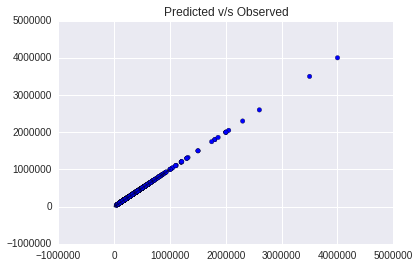

In [63]:
#graph of the model
predicted_values = mdl.predict(X_train)
plt.scatter(predicted_values, y_train)
plt.title('Predicted v/s Observed')
plt.plot([0,1000000],[0,1000000], c = 'black', alpha =0.5)

(0, 1000000)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


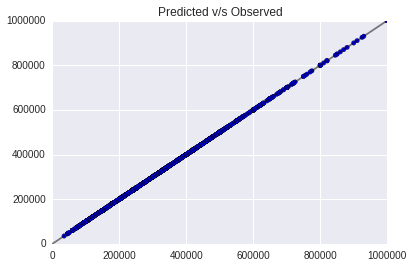

In [64]:
#Zoom
plt.scatter(predicted_values, y_train)
plt.title('Predicted v/s Observed')
plt.plot([0,1000000],[0,1000000], c = 'black', alpha =0.5)
plt.xlim((0,1000000))
plt.ylim((0,1000000))

In [65]:
#decision tree. 
from sklearn.tree import DecisionTreeRegressor
mdl1 = DecisionTreeRegressor()
mdl1 = mdl1.fit(X_train, y_train)
mdl1.score(X_train, y_train)

1.0

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


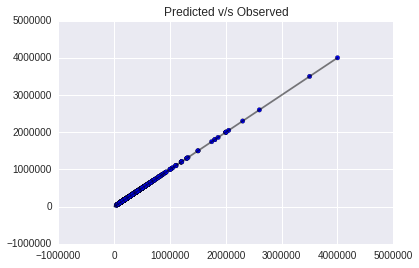

In [66]:
predicted_values = mdl1.predict(X_train)
plt.scatter(predicted_values,y_train)
plt.title('Predicted v/s Observed')

plt.plot([0,4000000],[0,4000000], c = 'black', alpha=0.5)

In [67]:
mdl1.score(X_test, y_test)

0.9383727386737174

There is a large decrease in test score as compaired to score on training data for 1 to 0.93, lets try again with some parameter tuning using GridSearchCV.

In [68]:
from sklearn.grid_search import GridSearchCV
mdl3 = DecisionTreeRegressor()
params = mdl3.get_params()
params
#DT parameters

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

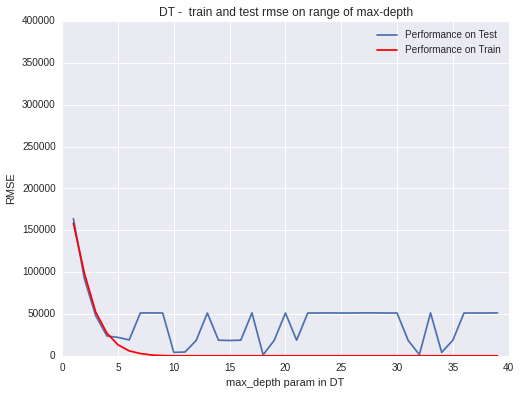

In [69]:
from sklearn.metrics import mean_squared_error

results_test = []
results_train = []
depths = range(1,40)
for depth in depths:
    mdl3 = DecisionTreeRegressor(max_depth=depth)
    mdl3 = mdl3.fit(X_train, y_train)
    y_pred = mdl3.predict(X_test)
    results_test.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    y_pred_train = mdl3.predict(X_train)
    results_train.append(np.sqrt(mean_squared_error(y_pred_train, y_train)))

plt.figure(figsize=(8,6))
plt.plot(depths, results_test, label='Performance on Test')
plt.plot(depths, results_train, c='red', label = 'Performance on Train')
plt.ylabel('RMSE')
plt.xlabel('max_depth param in DT')
plt.legend()
plt.ylim((0,400000))
plt.title('DT -  train and test rmse on range of max-depth')

Checking the performance on training set and testing set while changing max_depth parameter.

**Note:** Although I have used the **test set** for this visualisation of checking the performance of the model with hyperparameter I have not used the **test set** in question for the hyperparameter tuning itself, so the final score on the **test set** after the tuning below in this case in not biased, although I acknowledge that using the **test set** other than the final testing of the model is not a very good practice.

In [70]:
params = {'max_depth' : [3,4,5,6,7,8,9,10],
 'min_samples_leaf':[10,20,30,40,50,100,200]
 }
params

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [10, 20, 30, 40, 50, 100, 200]}

In [71]:

mdl_cv = GridSearchCV(mdl3,params, cv=10 )


mdl_cv = mdl_cv.fit(X_train, y_train)

mdl_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 10}

In [72]:
print(mdl_cv.score(X_test, y_test))
y_pred = mdl_cv.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.917309875448
59359.1453829


A very similar result this hyperparameter tuning is not helping us as much.

In [73]:

from sklearn.ensemble import RandomForestRegressor

mdl4 = RandomForestRegressor()
print(mdl4.get_params())



{'max_depth': None, 'verbose': 0, 'n_estimators': 10, 'warm_start': False, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.0, 'n_jobs': 1, 'oob_score': False, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_split': 2, 'random_state': None, 'min_samples_leaf': 1, 'criterion': 'mse'}


In [74]:

params = {'n_estimators':[10,100,300], 'max_features':[5,6,7], 'min_samples_leaf':[1,10,20] }

mdl_cv2 = GridSearchCV(mdl4,params, cv=5)
mdl_cv2 = mdl_cv2.fit(X_train, y_train)
mdl_cv2.best_params_
print(mdl_cv2.score(X_test, y_test)) 
y_pred2 = mdl_cv2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred2)))

0.564795106625
136178.235152


In [75]:
#Feature selection
from sklearn.feature_selection import f_regression, SelectKBest

In [76]:
print(X_train.shape)
clf = SelectKBest(k=16).fit(X_train, y_train)
X_train_k = clf.transform(X_train)
X_test_k = clf.transform(X_test)

(3001, 77)


/usr/local/lib/python3.4/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [72] are constant.
  UserWarning)


In [77]:
rfr = RandomForestRegressor()
print(rfr.get_params())
params = {'n_estimators':[10,100,300], 'max_features':[5,6,7], 'min_samples_leaf':[1,10,20] }

mdl_cv3 = GridSearchCV(rfr,params, cv=5)
mdl_cv3 = mdl_cv3.fit(X_train_k, y_train)
mdl_cv3.best_params_
print(mdl_cv3.score(X_test_k, y_test)) 
y_pred3 = mdl_cv3.predict(X_test_k)
print(np.sqrt(mean_squared_error(y_test, y_pred3)))


{'max_depth': None, 'verbose': 0, 'n_estimators': 10, 'warm_start': False, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.0, 'n_jobs': 1, 'oob_score': False, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_split': 2, 'random_state': None, 'min_samples_leaf': 1, 'criterion': 'mse'}
0.88545377972
69863.6382117


In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print(gbr.score(X_test, y_test)) 
y_pred4 = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred4)))


0.993180601166
17046.4465897


Uptill now **GradientBoostingRegressor** and **DecisionTreeRegressor** are giving us the best score so as finally I am going to try with **xgboost** as *they* say it is best right now with root mean square as my eval metric for the cross validation, this should give us the best result without any overfitting.

In [80]:
import xgboost as xgb
from sklearn.metrics import r2_score
eta = 0.1
max_depth = 3
subsample = 0.7
colsample_bytree = 0.7
random_state=0

print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
params = {
    "objective": "reg:linear",
    "booster" : "gbtree",
    "eval_metric": "rmse",
    "eta": eta,
    "max_depth": max_depth,
    "subsample": subsample,
    "colsample_bytree": colsample_bytree,
    "silent": 1,
    "seed": random_state,
}
num_boost_round = 500
early_stopping_rounds = 50
test_size = 0.3


dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

print("Validating...")
check = gbm.predict(xgb.DMatrix(X_test), ntree_limit=gbm.best_iteration)
score1 = mean_squared_error(y_test.tolist(), check)
score2 = np.sqrt(mean_squared_error(y_test.tolist(),check))
print(r2_score(y_test.tolist(),check))
print(score2)

Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:339302.531250	eval-rmse:329487.968750
[1]	train-rmse:314994.343750	eval-rmse:305879.656250
[2]	train-rmse:294358.375000	eval-rmse:285916.656250
[3]	train-rmse:266612.093750	eval-rmse:260709.437500
[4]	train-rmse:242234.859375	eval-rmse:238799.921875
[5]	train-rmse:219826.312500	eval-rmse:218394.375000
[6]	train-rmse:199661.046875	eval-rmse:199534.515625
[7]	train-rmse:181421.984375	eval-rmse:182957.843750
[8]	train-rmse:165009.093750	eval-rmse:167750.171875
[9]	train-rmse:150161.218750	eval-rmse:155125.062500
[10]	train-rmse:141351.328125	eval-rmse:147767.562500
[11]	train-rmse:128982.031250	eval-rmse:136249.515625
[12]	train-rmse:122183.320312	eval-rmse:130856.226562
[13]	train-rmse:111767.898438	eval-rmse:122116.460938
[14]	train-rmse:102291.960938	eval-rmse:113635.179688
[15]	train-rmse:97628.031250	eval-rmse:110184.812500
[16]	train-rmse:89284.796875	eval-rmse:102865.703125
[17]	train-rmse:82162.804688	eval-r

XGBoost params. ETA: 0.1, MAX_DEPTH: 3, SUBSAMPLE: 0.7, COLSAMPLE_BY_TREE: 0.7
Validating...
0.980741556881
28646.4892002


[477]	train-rmse:2675.326904	eval-rmse:28647.572266
[478]	train-rmse:2673.480713	eval-rmse:28647.671875
[479]	train-rmse:2672.821289	eval-rmse:28648.005859
[480]	train-rmse:2668.552490	eval-rmse:28655.267578
[481]	train-rmse:2665.050537	eval-rmse:28655.181641
[482]	train-rmse:2661.214355	eval-rmse:28654.767578
[483]	train-rmse:2657.937256	eval-rmse:28654.359375
[484]	train-rmse:2655.899414	eval-rmse:28658.271484
[485]	train-rmse:2651.171631	eval-rmse:28663.232422
[486]	train-rmse:2650.065674	eval-rmse:28661.851562
[487]	train-rmse:2645.085449	eval-rmse:28663.091797
[488]	train-rmse:2642.726562	eval-rmse:28663.363281
[489]	train-rmse:2641.696045	eval-rmse:28663.738281
[490]	train-rmse:2640.241943	eval-rmse:28663.460938
[491]	train-rmse:2637.579590	eval-rmse:28661.734375
[492]	train-rmse:2637.261475	eval-rmse:28662.093750
[493]	train-rmse:2633.785889	eval-rmse:28659.744141
[494]	train-rmse:2627.747559	eval-rmse:28657.763672
[495]	train-rmse:2626.672607	eval-rmse:28657.349609
[496]	train-

This is definitly not overfitting R^2 score = **0.980741556881** and rmse = **28646.4892002**.